In [55]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
# dataset 1 is job listings

In [43]:
job_listings = pd.read_csv('Datasets/job_listings.csv', dtype={"title":str, "company_name":str, "city":str, "region":str, "zip":str, "created":str, "last_checked":str, "last_updated":str, "delete_date":str, "onet_occupation_code":str, "SOC_occupation_code":str, "url":str, "stock_exchange_country":str, "stock_exchange_name":str, "stock_ticker":str, "ticker_end_date":str, "ticker_start_date":str})
job_listings["created"] = job_listings.created.apply(lambda x: datetime.fromisoformat(x))
job_listings["delete_date"] = job_listings.delete_date.apply(lambda x: datetime.fromisoformat(x))

In [6]:
# not using this
onet_code_legend = pd.read_csv('Datasets/Code Legends/onet_code_legend.csv')

In [7]:
soc_code_legend = pd.read_csv('Datasets/Code Legends/soc_code_legend.csv')

In [114]:
job_listings["created_year"] = [x.year for x in job_listings.created]
job_listings["created_month"] = [x.month for x in job_listings.created]
job_listings["deleted_year"] = [x.year for x in job_listings.delete_date]
job_listings["deleted_month"] = [x.month for x in job_listings.delete_date]

In [154]:
jobcountsList = []
datesList = []
monthmap = {"1":"Jan", "2":"Feb", "3":"Mar", "4":"Apr", "5":"May", "6":"Jun", "7":"Jul", "8":"Aug", "9":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
years = []
for year in range (2011, 2020, 1):
    years.append(year)
    jobcounts = []
    dates = []    
    for month in range(1,13,1):
        # this = job_listings[job_listings.created.apply(lambda x:  x.year <= year and  x.month <= month) & job_listings.delete_date.apply(lambda x:  x.year >= year and  x.month >= month)]
        this = job_listings

        this = this[this.created_year <= year]
        this = this[this.created_month <= month]
        this = this[this.deleted_year >= year]
        this = this[this.deleted_month >= month]
        # job_listings.deleted_year >= year & job_listings.deleted_month >= month]
        jobcounts.append(this["title"].count())
        # dates.append("{} {}".format(monthmap[str(month)],"'"+str(year).lstrip("20")))
        dates.append("{}".format(monthmap[str(month)]))
    jobcountsList.append(jobcounts)
    datesList.append(dates)    




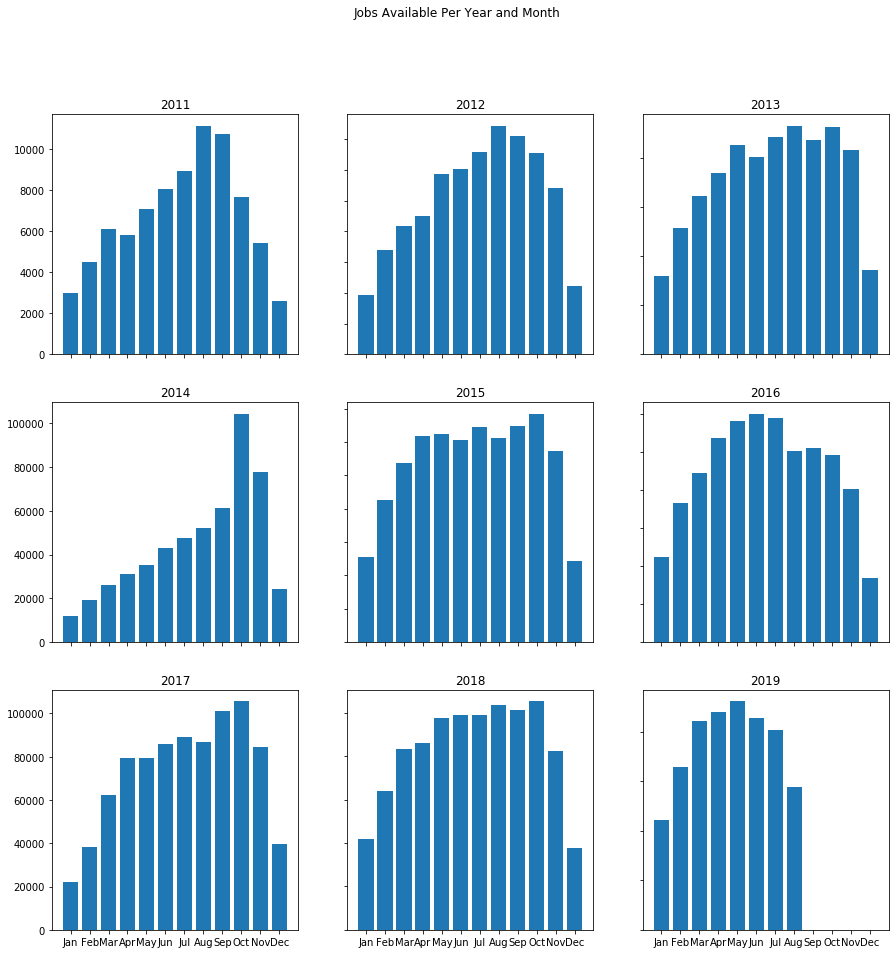

In [161]:
# plot this month
# plt.figure(figsize=(20,10))
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
fig.suptitle('Jobs Available Per Year and Month')
for ax,dates, jobcounts, year in zip(axs.flat, datesList, jobcountsList, years):
    ax.bar(dates,jobcounts)
    ax.set_title(str(year))

for ax in axs.flat:
    ax.label_outer()
plt.show()


In [49]:
job_listings = job_listings.dropna(subset=["created","delete_date"])

In [11]:
soc_code_legend.describe()


,Major Group,Sub-Major Group,Minor Group,Unit Group
count,493.000000,484.000000,475.000000,369.000000
mean,4.436105,46.456612,466.090526,4687.406504
std,2.521951,24.896310,248.569592,2479.557057
min,1.000000,11.000000,111.000000,1115.000000
25%,2.000000,24.000000,243.000000,2434.000000
50%,4.000000,41.000000,413.000000,4135.000000
75%,6.000000,62.000000,622.000000,6222.000000
max,9.000000,92.000000,927.000000,9279.000000
